In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset

In [2]:
boston = fetch_openml(name='boston')
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target

c:\users\ngois\appdata\local\programs\python\python39\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


Use scikit-learn to load the Boston dataset from fetch_openml, then create a pandas DataFrame from the data

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Print first 5 rows

# Data preparing and cleaning

In [4]:
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
price       float64
dtype: object

check types of each col.
as you see, CHAS and RAD is category type

In [5]:
df['CHAS'] = pd.to_numeric(df['CHAS'])
df['RAD'] = pd.to_numeric(df['RAD'])

So I try to convert their types to number

Check null values

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

There's no null value

Check missing values

In [7]:
for col in df.columns:
    print(col, ': ', df[col].isin([0]).sum())

CRIM :  0
ZN :  372
INDUS :  0
CHAS :  471
NOX :  0
RM :  0
AGE :  0
DIS :  0
RAD :  0
TAX :  0
PTRATIO :  0
B :  0
LSTAT :  0
price :  0


Because there are a lot of missing values in 'ZN'and 'CHAS', So I choose the solution is drop that cols

In [8]:
df=df.drop('ZN', axis=1)
df=df.drop('CHAS', axis=1)

Check outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


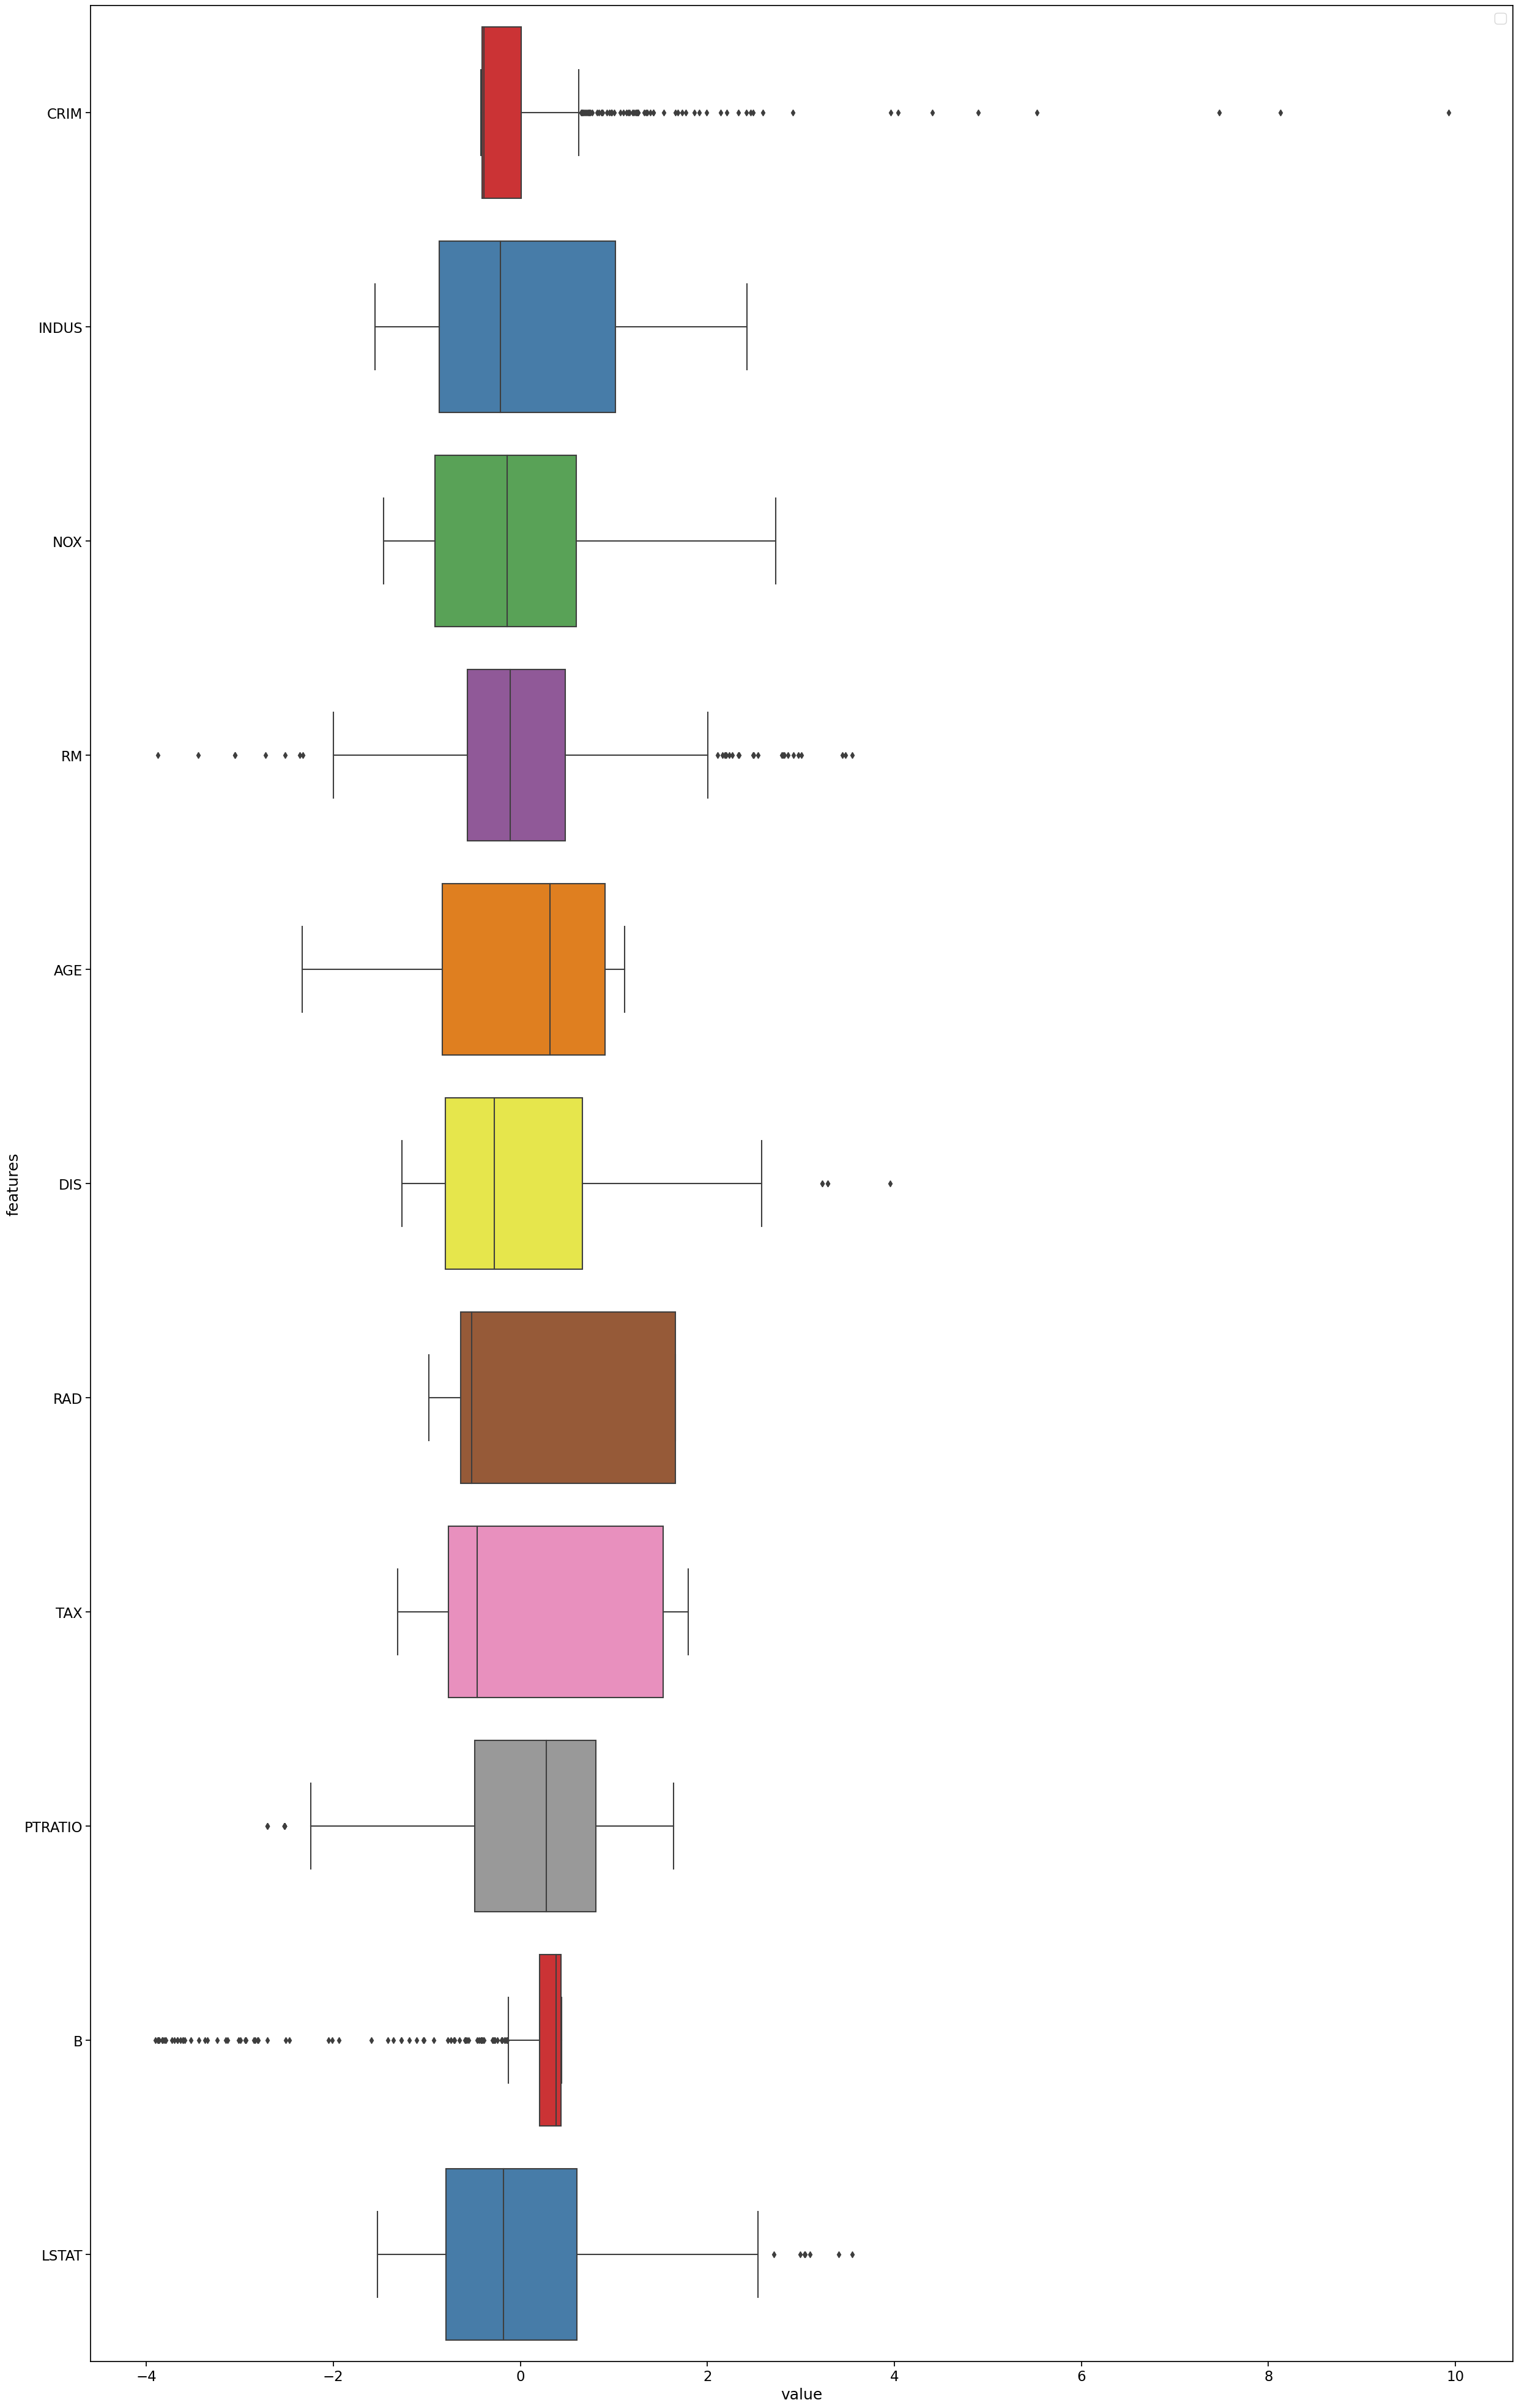

In [9]:
features=df.drop('price',axis=1)
y=df.price
stdX = (features - features.mean()) / (features.std())              
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="price",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,50))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", data=data_st, palette='Set1')
plt.legend(loc='best')


Handling Outliers

In [10]:

from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)
for i in features:
    df[i]= BoxplotOutlierClipper().fit_transform(df[i])

# Data Visuallization

Calculate Correlation

In [11]:
df.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,0.629315,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.454495
INDUS,0.629315,1.000000,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.483725
NOX,0.663412,0.763651,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.427321
RM,-0.260057,-0.408704,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.701725
AGE,0.518951,0.644779,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.376955
DIS,-0.555054,-0.713079,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.253172
RAD,0.926977,0.595129,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.381626
TAX,0.870686,0.720760,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.468536
PTRATIO,0.416269,0.382359,0.190159,-0.353695,0.263355,-0.238556,0.466698,0.462693,1.000000,-0.099739,0.376433,-0.507188
B,-0.436156,-0.417485,-0.427034,0.196260,-0.307560,0.311406,-0.392793,-0.433288,-0.099739,1.000000,-0.350237,0.271067


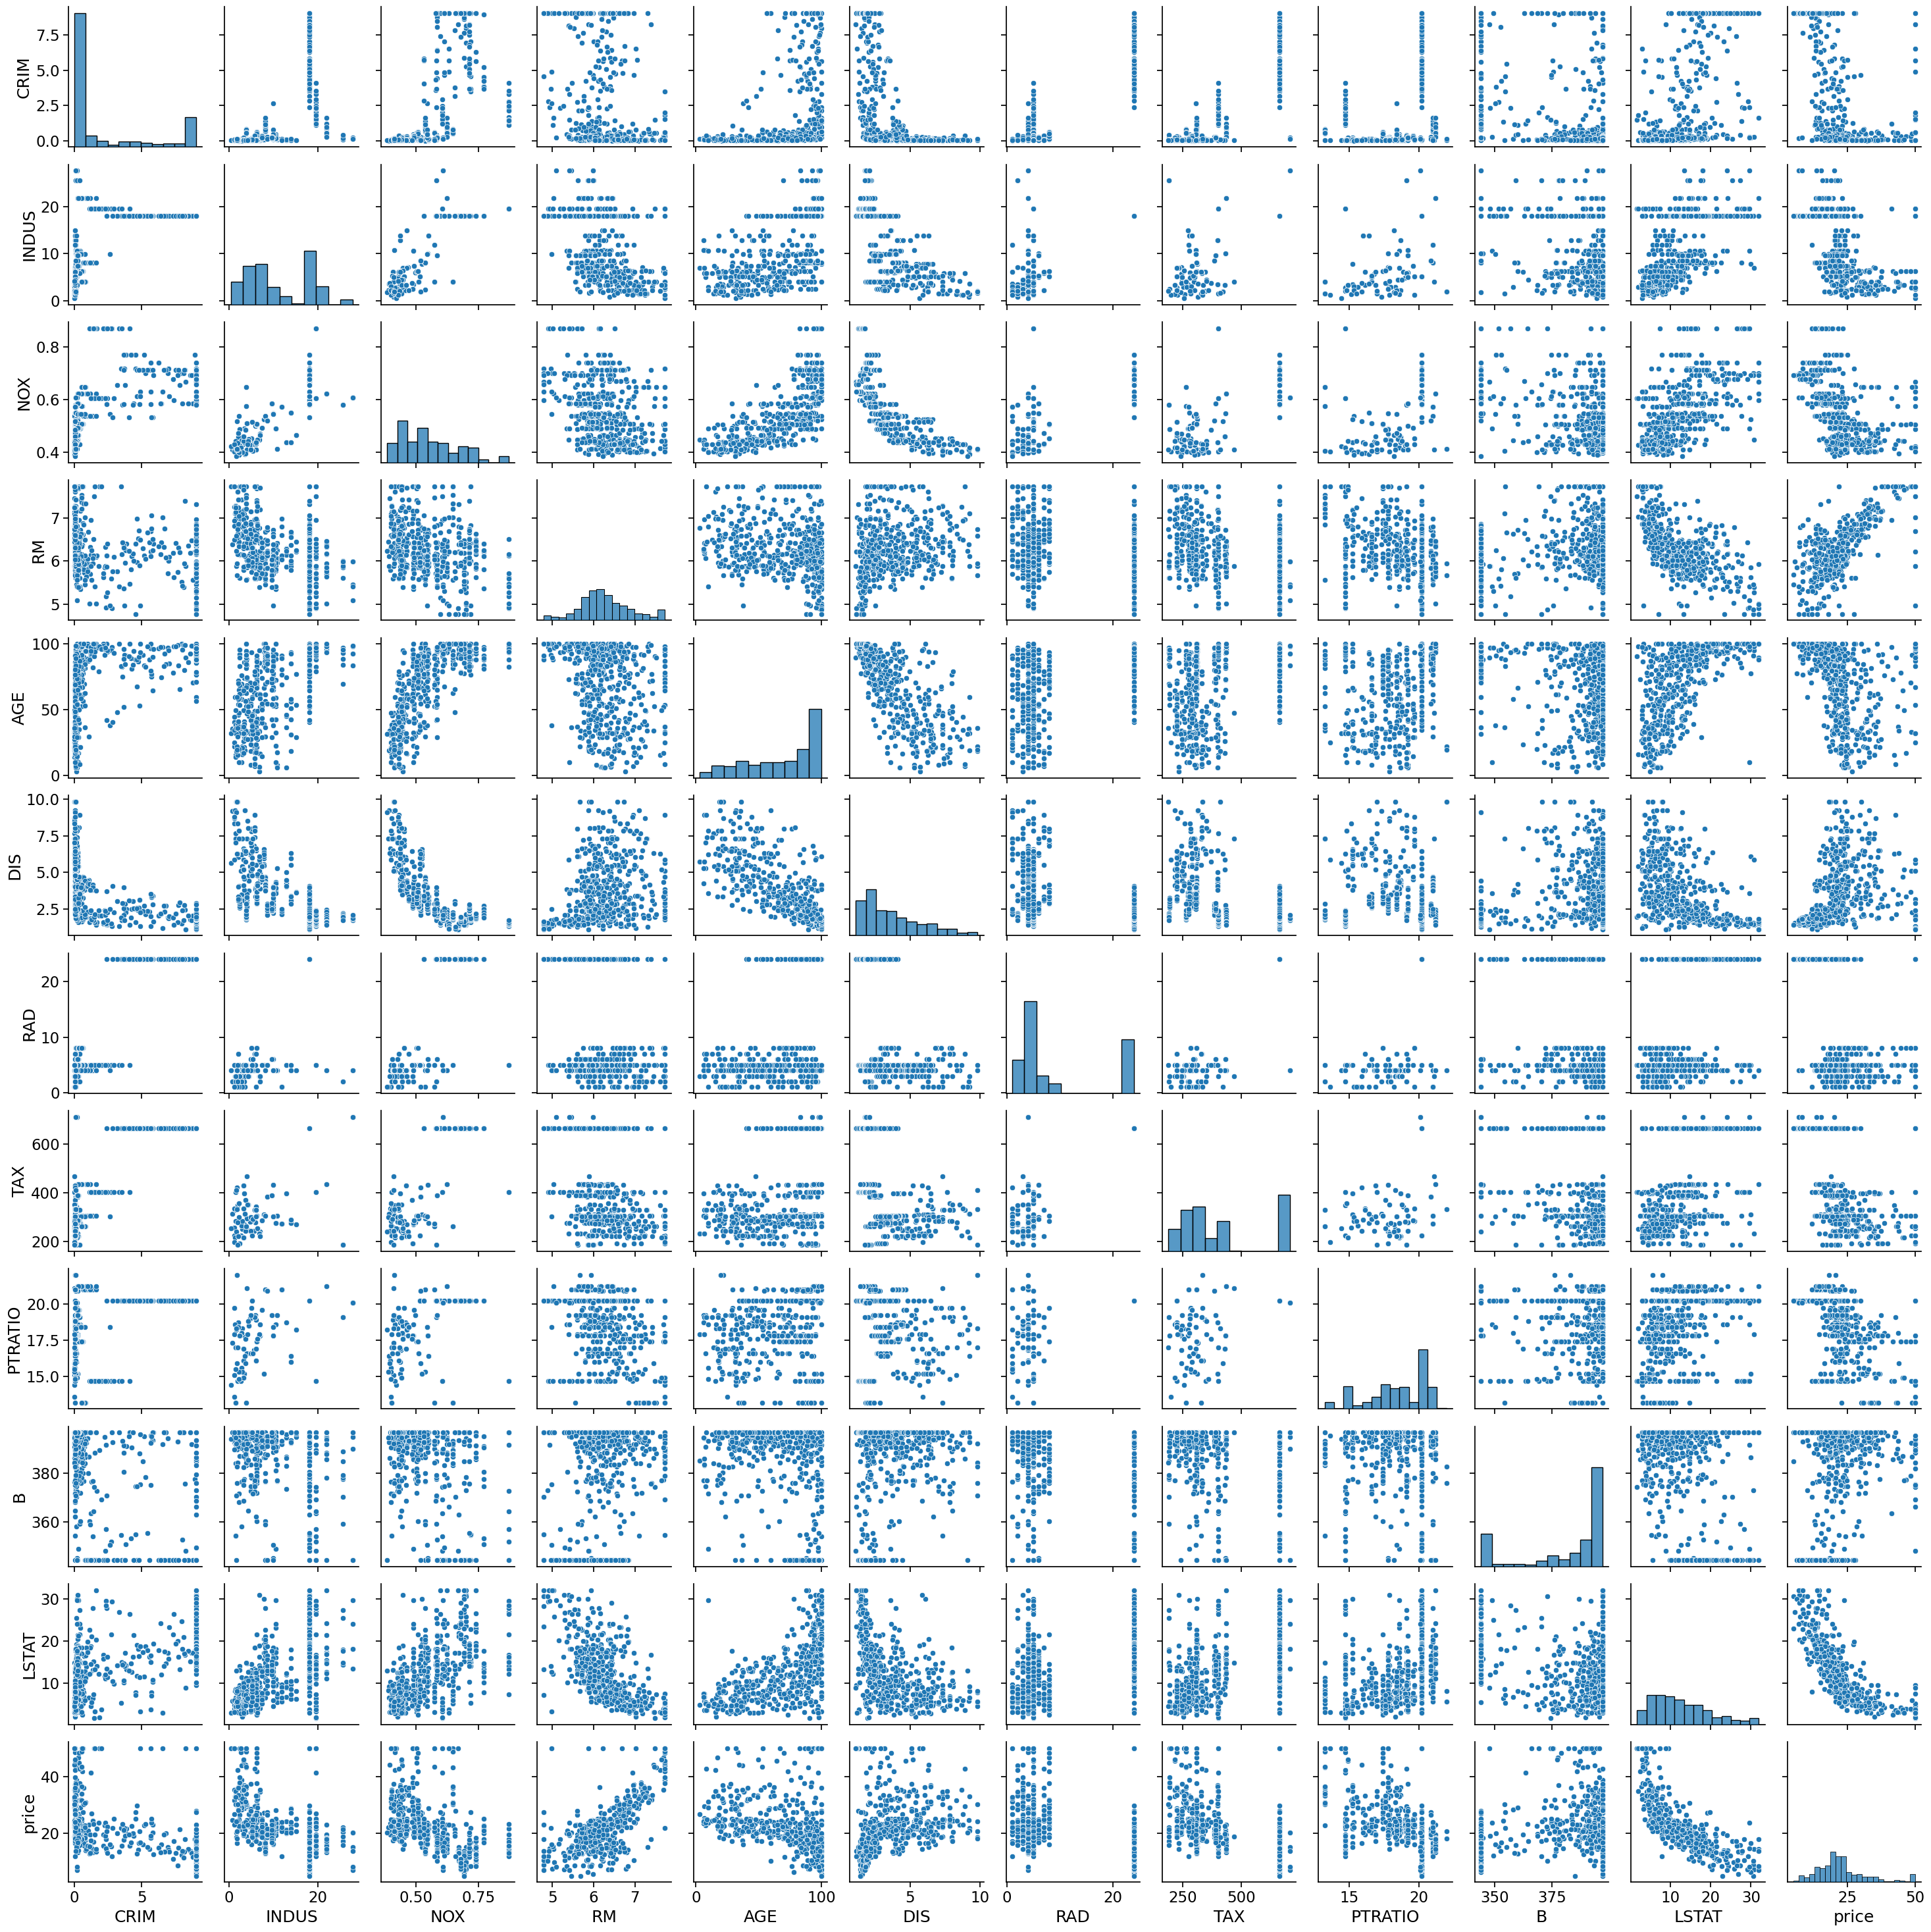

In [12]:
sns.pairplot(df)

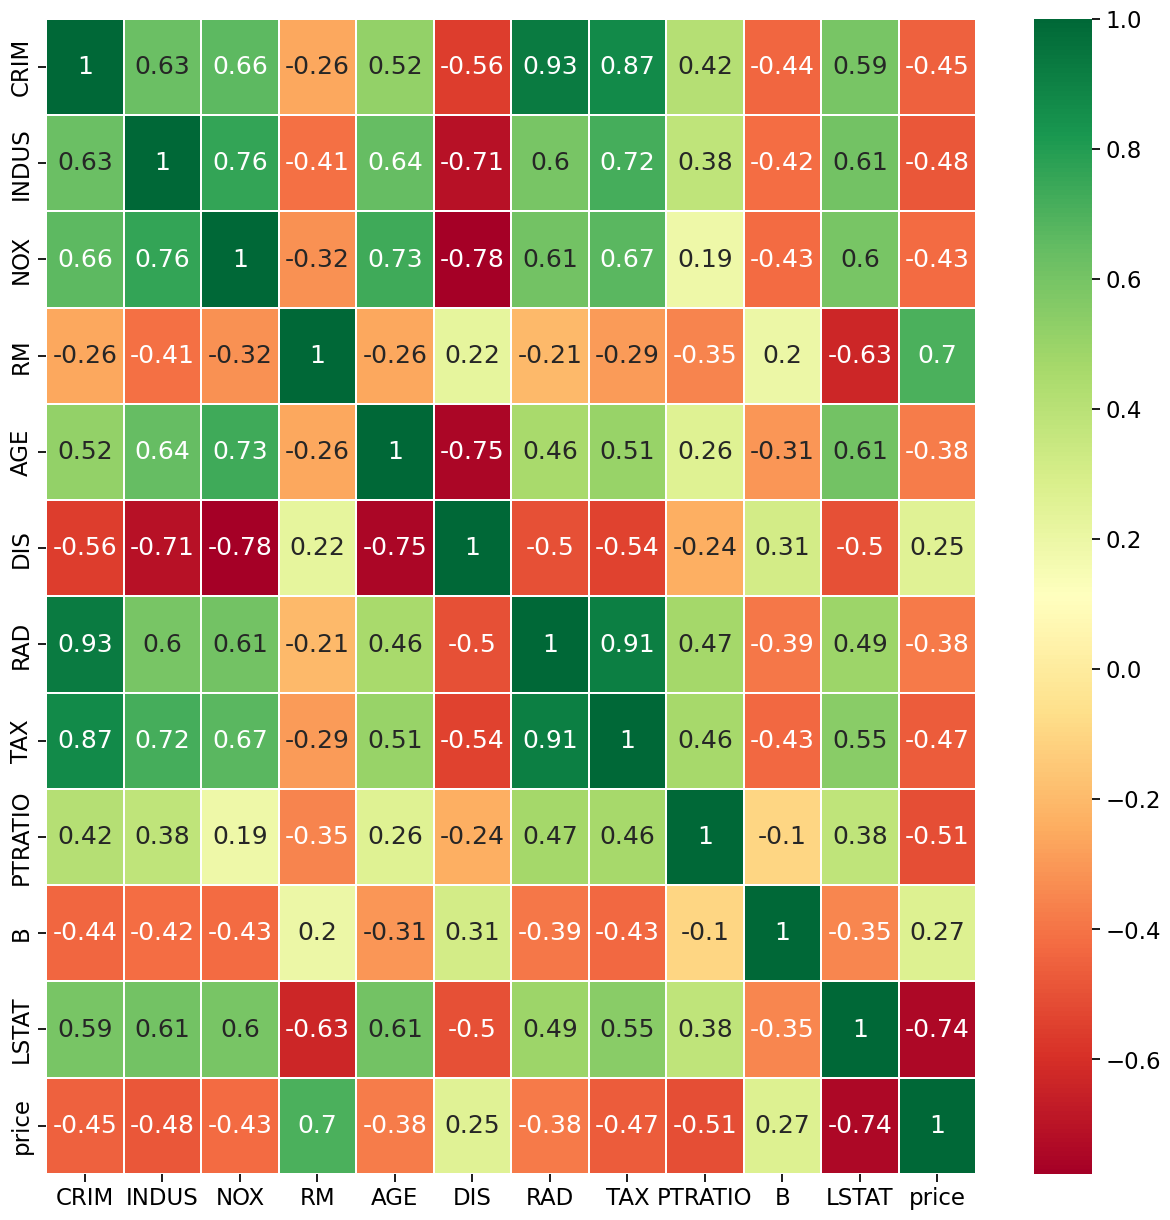

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.30,cmap ='RdYlGn',annot=True)
plt.show()

Some cols : 'CRIM', 'RM', 'LSTAT', 'PTRATIO' have high corr with col 'price'

<Axes: xlabel='CRIM', ylabel='price'>

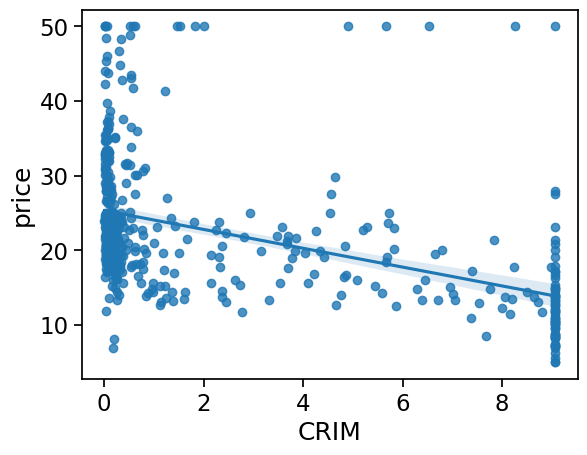

In [14]:
sns.regplot(x='CRIM',y='price',data=df)

<Axes: xlabel='RM', ylabel='price'>

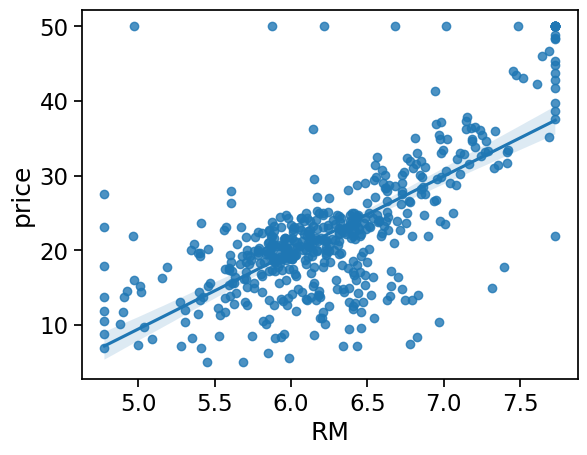

In [15]:
sns.regplot(x='RM',y='price',data=df)

<Axes: xlabel='LSTAT', ylabel='price'>

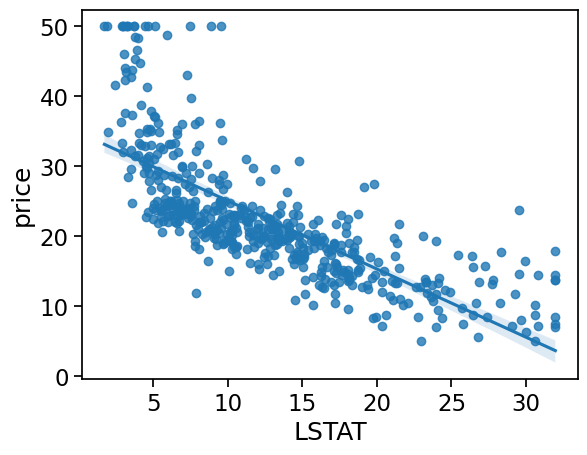

In [16]:
sns.regplot(x='LSTAT',y='price',data=df)

<Axes: xlabel='PTRATIO', ylabel='price'>

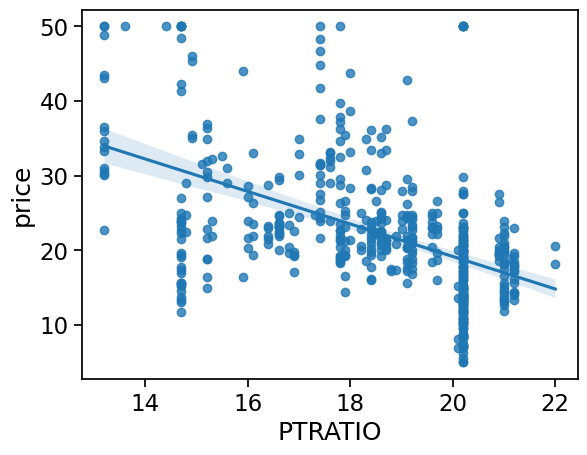

In [17]:
sns.regplot(x='PTRATIO',y='price',data=df)

# Linear Regression

Splitting data into features and target

In [18]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [19]:
y.value_counts(normalize=True)

50.0    0.031621
25.0    0.015810
22.0    0.013834
21.7    0.013834
23.1    0.013834
          ...   
32.9    0.001976
34.6    0.001976
30.3    0.001976
33.3    0.001976
8.1     0.001976
Name: price, Length: 229, dtype: float64

In [20]:
X.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [21]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

Splitting data into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.3, random_state=42)

tran-test : 70-30

Standardize the data

In [23]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

Training the model

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Call Linear regression model to train the model

In [25]:
y_pred = lr.predict(X_test)

Calculate the Accuracy

In [26]:
accuracy = lr.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7078631691064812


The model has the ability to correctly predict about 70.8% on the test set.

# Model Evaluation

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 21.768019599262576


MSE value is 21.77, showing a rather large deviation between predicted and actual values.

In [28]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 3.291536178535751


The MAE is 3.29, showing that the degree of bias is also quite large.

In [31]:
from sklearn.metrics import r2_score
score= r2_score(y_test,y_pred)
print('R2:',score)

R2: 0.7078631691064812


In [32]:
ad_rs=1-(1-score)*(len(y_test)-1)/(len(y_test-X_test.shape[1]-1))
print('Adj R2:',ad_rs)

Adj R2: 0.7097851219413069


R2 is 0.71, which is relatively close to the value of R2, indicating that the model still explains the data well

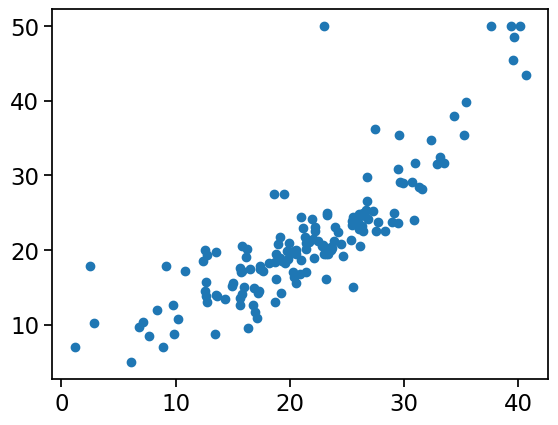

In [33]:
plt.scatter(y_pred,y_test)


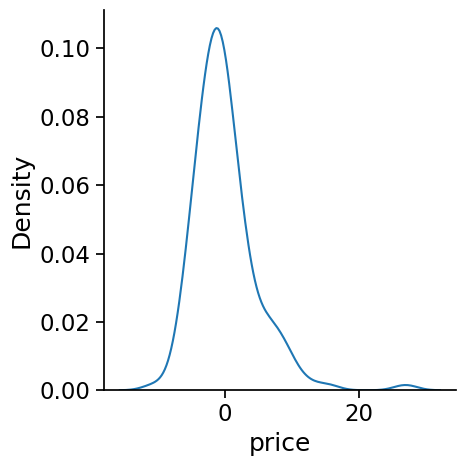

In [34]:
res= y_test-y_pred
sns.displot(res,kind="kde")